## Gradient Boosting

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris_data = load_iris().data
iris_target = load_iris().target

x_train, x_test, y_train, y_test = train_test_split(iris_data, iris_target, shuffle=True, test_size=0.4, stratify=iris_target)

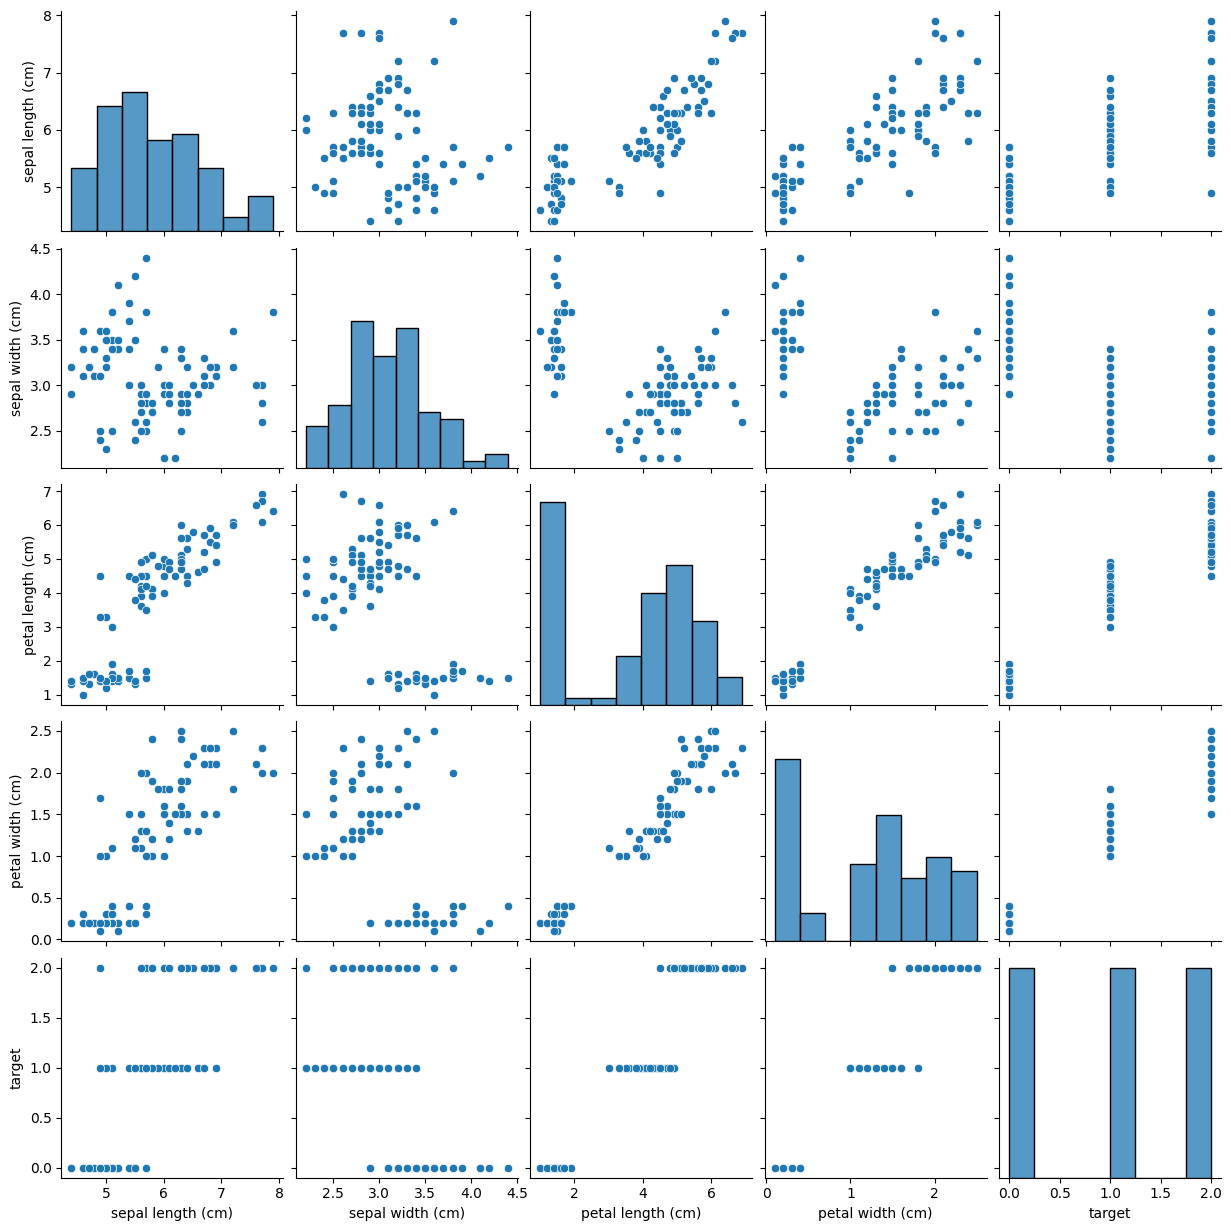

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (8, 4)

df_1 = pd.DataFrame(x_train, columns=load_iris().feature_names)
df_2 = pd.DataFrame(y_train, columns=["target"])
df = pd.concat([df_1, df_2], axis=1)

sns.pairplot(df)

plt.show()

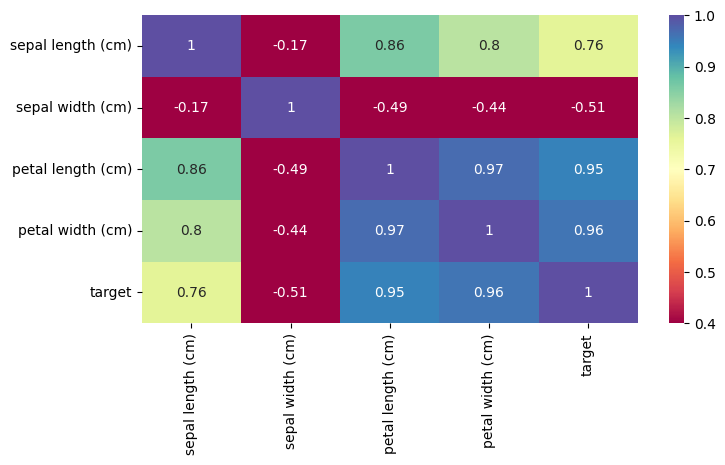

In [3]:
sns.heatmap(df.corr(), annot=True, vmin=0.4, cmap="Spectral")
plt.show()

In [41]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

clf = LogisticRegression()
y_pred = clf.fit(x_train, y_train).predict(x_test)

print(f'confusion_martrix : \n{confusion_matrix(y_pred, y_test)}\n')
print(f'classification_report : \n{classification_report(y_test, y_pred)}')


confusion_martrix : 
[[20  0  0]
 [ 0 18  1]
 [ 0  2 19]]

classification_report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.95      0.90      0.92        20
           2       0.90      0.95      0.93        20

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



c:\Users\4ser\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target

# 다중 공선성이 있는 변수 제거
X = np.delete(X, 1, axis=1)

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습 및 예측
lr = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

print("로지스틱 회귀 정확도: {:.3f}".format(lr.score(X_test, y_test)))
print("랜덤 포레스트 정확도: {:.3f}".format(rf.score(X_test, y_test)))
print("경사 부스팅 분류기 정확도: {:.3f}".format(gb.score(X_test, y_test)))

c:\Users\4ser\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


로지스틱 회귀 정확도: 1.000
랜덤 포레스트 정확도: 1.000
경사 부스팅 분류기 정확도: 1.000


In [5]:
y_pred

array([1, 2, 1, 2, 0, 2, 1, 0, 0, 2, 2, 1, 0, 2, 1, 0, 1, 2, 0, 1, 1, 0,
       1, 2, 2, 0, 1, 0, 2, 2, 0, 2, 0, 0, 1, 2, 1, 1, 0, 0, 2, 1, 1, 2,
       1, 1, 1, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0])

In [6]:
y_test

array([1, 1, 1, 2, 0, 2, 1, 0, 0, 2, 2, 1, 0, 2, 1, 0, 1, 2, 0, 1, 1, 0,
       1, 1, 2, 0, 1, 0, 2, 2, 0, 2, 0, 0, 1, 2, 1, 1, 0, 0, 2, 1, 1, 2,
       1, 1, 1, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0])

## 다중공선성 판단

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

X = data[['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)

   VIF Factor           features
0   15.984946  sepal length (cm)
1   95.111245  petal length (cm)
2   49.204035   petal width (cm)


## 2023-03-05 공부한 것.
1. 데이터 전처리는 하면 할수록 좋은게 아니라 데이터 별로 다른 전처리 방법을 선택해야 한다.
   1. 어떤 데이터는 아무런 전처리를 하지 않은 원형 데이터를 학습시키는 것이 더 좋은 결과를 낼 수도 있다.
   2. 다중공선성이 존재하는 독립변수가 있어도 알고리즘 모델의 성능이 항상 저하되는 것은 아니다. 그러나, 다중공선성이 높으면 모델이 잘못된 독립변수를 선택할 가능성이 높아진다.
      1. 다중공선성에 강건한 알고리즘 : 결정트리, 랜덤포레스트
      2. 다중공선성에 약한 알고리즘 : 로지스틱 회귀
   3. 그러니, 모든 전처리 방법을 시도해보고 가장 효과적인 방법을 찾는게 좋음.
   
2. fit_transform()함수와 transform()함수의 차이점은 새로운 데이터를 변환할 때 이전에 사용된 통계값의 유무이다.
   1. 차원 축소를 위해 x_test 데이터에도 스케일링을 해야하는 경우, fit_transform()함수가 아니라 transform() 함수를 사용하자.
   2. 자세한 것은 ChatGPT 캡처 참조.
   
3. 이상치를 처리할 때는 아무거나 막하지 말자.
   1. 만약 어떤 이상치가 진짜 정상적으로 도출된 데이터라면 삭제하면 안되고, 이상치에 강건한 알고리즘 모델을 선택해야 한다.
   2. 대표적인 로버스트한 알고리즘 : 결정트리, 랜덤 포레스트, 부스팅, 배깅 앙상블, Robust Regression 등